In [1]:
# 결측값 처리
import numpy as np
import pandas as pd
data = {'x1': [13,np.nan,17,20,22,21,11,56,999,64],
       'x2': [9,555,17,11,np.nan,10,17,777,22,34],
       'y': [20,np.nan,30,27,np.nan,32,17,20,22,899]}

df = pd.DataFrame(data)
df

,x1,x2,y
0,13.0,9.0,20.0
1,NaN,555.0,NaN
2,17.0,17.0,30.0
3,20.0,11.0,27.0
4,22.0,NaN,NaN
5,21.0,10.0,32.0
6,11.0,17.0,17.0
7,56.0,777.0,20.0
8,999.0,22.0,22.0
9,64.0,34.0,899.0


In [2]:
df_0 = df.fillna(0)
df_0

,x1,x2,y
0,13.0,9.0,20.0
1,0.0,555.0,0.0
2,17.0,17.0,30.0
3,20.0,11.0,27.0
4,22.0,0.0,0.0
5,21.0,10.0,32.0
6,11.0,17.0,17.0
7,56.0,777.0,20.0
8,999.0,22.0,22.0
9,64.0,34.0,899.0


In [30]:
from IPython.display import display
df1 = df.fillna(method='bfill')
df2 = df.fillna(method='backfill')
display(df1);display(df2)

,x1,x2,y
0,13.0,9.0,20.0
1,17.0,555.0,30.0
2,17.0,17.0,30.0
3,20.0,11.0,27.0
4,22.0,10.0,32.0
5,21.0,10.0,32.0
6,11.0,17.0,17.0
7,56.0,777.0,20.0
8,999.0,22.0,22.0
9,64.0,34.0,899.0


,x1,x2,y
0,13.0,9.0,20.0
1,17.0,555.0,30.0
2,17.0,17.0,30.0
3,20.0,11.0,27.0
4,22.0,10.0,32.0
5,21.0,10.0,32.0
6,11.0,17.0,17.0
7,56.0,777.0,20.0
8,999.0,22.0,22.0
9,64.0,34.0,899.0


In [29]:
from IPython.display import display
a = df.fillna(df.mean())
b = df.where(pd.notnull(df),df.mean(),axis='columns')

display(a);display(b.round(2))

,x1,x2,y
0,13.000000,9.000000,20.000
1,135.888889,555.000000,133.375
2,17.000000,17.000000,30.000
3,20.000000,11.000000,27.000
4,22.000000,161.333333,133.375
5,21.000000,10.000000,32.000
6,11.000000,17.000000,17.000
7,56.000000,777.000000,20.000
8,999.000000,22.000000,22.000
9,64.000000,34.000000,899.000


,x1,x2,y
0,13.00,9.00,20.00
1,135.89,555.00,133.38
2,17.00,17.00,30.00
3,20.00,11.00,27.00
4,22.00,161.33,133.38
5,21.00,10.00,32.00
6,11.00,17.00,17.00
7,56.00,777.00,20.00
8,999.00,22.00,22.00
9,64.00,34.00,899.00


In [14]:
a = df.fillna(df.median())
b = df.where(pd.notnull(df),df.median(),axis='columns') # row(ㅡ) >> axis=1  //  column(ㅣ) >> axis=0

print(a);print(b)

      x1     x2      y
0   13.0    9.0   20.0
1   21.0  555.0   24.5
2   17.0   17.0   30.0
3   20.0   11.0   27.0
4   22.0   17.0   24.5
5   21.0   10.0   32.0
6   11.0   17.0   17.0
7   56.0  777.0   20.0
8  999.0   22.0   22.0
9   64.0   34.0  899.0
      x1     x2      y
0   13.0    9.0   20.0
1   21.0  555.0   24.5
2   17.0   17.0   30.0
3   20.0   11.0   27.0
4   22.0   17.0   24.5
5   21.0   10.0   32.0
6   11.0   17.0   17.0
7   56.0  777.0   20.0
8  999.0   22.0   22.0
9   64.0   34.0  899.0


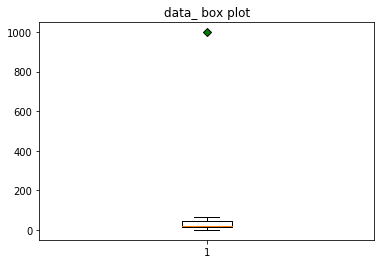

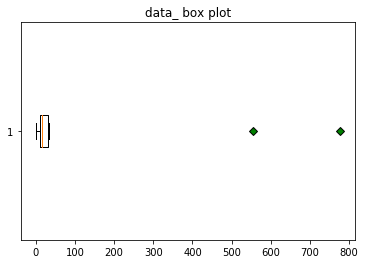

In [21]:
# 이상값 처리
import matplotlib.pyplot as plt

green_diamond = dict(markerfacecolor='g',marker='D')
plt.boxplot(df_0['x1'], flierprops=green_diamond)
plt.title("data_ box plot")
plt.show()

green_diamond = dict(markerfacecolor='g',marker='D')
plt.boxplot(df_0['x2'], vert=False, flierprops=green_diamond) # 세로 박스플랏 그리고 싶으면 >> vert=False (디폴트가 True임)
plt.title("data_ box plot")
plt.show()

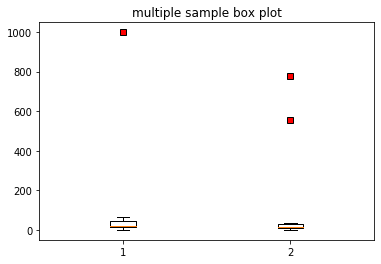

In [23]:
data = [df_0['x1'], df_0['x2']]
green_diamond = dict(markerfacecolor='r',marker='s')
plt.boxplot(data, flierprops=green_diamond) 
plt.title("multiple sample box plot")
plt.show()

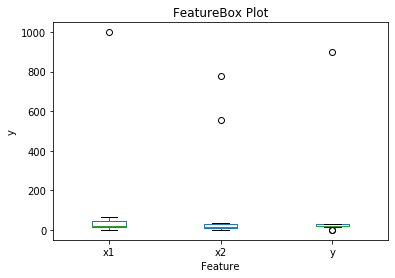

In [24]:
df_0.plot.box()
plt.title("FeatureBox Plot")
plt.xlabel("Feature")
plt.ylabel("y")
plt.show()

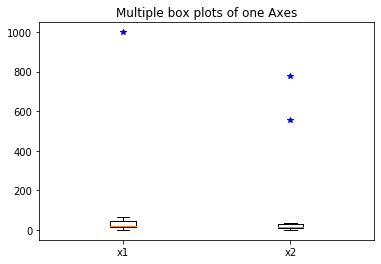

In [27]:
ig, ax = plt.subplots()

ax.boxplot([df_0['x1'], df_0['x2']], sym="b*")
plt.title('Multiple box plots of one Axes')
plt.xticks([1,2], ['x1','x2'])

plt.show()

In [37]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()
scaler.fit(df_0)
X_train_1 = scaler.transform(df_0)

scaler = MinMaxScaler()
scaler.fit(df_0)
X_train_2 = scaler.transform(df_0)

scaler = MaxAbsScaler()
scaler.fit(df_0)
X_train_3 = scaler.transform(df_0)

scaler = RobustScaler()
scaler.fit(df_0)
X_train_4 = scaler.transform(df_0)

display(pd.DataFrame(X_train_1, columns = ['x1','x2','y']))
display(pd.DataFrame(X_train_2, columns = ['x1','x2','y']))
display(pd.DataFrame(X_train_3, columns = ['x1','x2','y']))
display(pd.DataFrame(X_train_4, columns = ['x1','x2','y']))

,x1,x2,y
0,-0.373239,-0.513526,-0.328029
1,-0.417631,1.545103,-0.403698
2,-0.359580,-0.483363,-0.290194
3,-0.349335,-0.505985,-0.301544
4,-0.342506,-0.547459,-0.403698
5,-0.345920,-0.509756,-0.282627
6,-0.380068,-0.483363,-0.339379
7,-0.226402,2.382127,-0.328029
8,2.993765,-0.464511,-0.320462
9,-0.199083,-0.419266,2.997659


,x1,x2,y
0,0.013013,0.011583,0.022247
1,0.000000,0.714286,0.000000
2,0.017017,0.021879,0.033370
3,0.020020,0.014157,0.030033
4,0.022022,0.000000,0.000000
5,0.021021,0.012870,0.035595
6,0.011011,0.021879,0.018910
7,0.056056,1.000000,0.022247
8,1.000000,0.028314,0.024472
9,0.064064,0.043758,1.000000


,x1,x2,y
0,0.013013,0.011583,0.022247
1,0.000000,0.714286,0.000000
2,0.017017,0.021879,0.033370
3,0.020020,0.014157,0.030033
4,0.022022,0.000000,0.000000
5,0.021021,0.012870,0.035595
6,0.011011,0.021879,0.018910
7,0.056056,1.000000,0.022247
8,1.000000,0.028314,0.024472
9,0.064064,0.043758,1.000000


,x1,x2,y
0,-0.223881,-0.385542,-0.086957
1,-0.611940,25.927711,-1.826087
2,-0.104478,0.000000,0.782609
3,-0.014925,-0.289157,0.521739
4,0.044776,-0.819277,-1.826087
5,0.014925,-0.337349,0.956522
6,-0.283582,0.000000,-0.347826
7,1.059701,36.626506,-0.086957
8,29.208955,0.240964,0.086957
9,1.298507,0.819277,76.347826


In [40]:
from sklearn.preprocessing import MinMaxScaler
a = [[10],[9],[8],[6],[2]]
scaler = MinMaxScaler(feature_range=(0,1)) # feature_range=(0,1) 빼도 똑같은 결과 나온다 >> MinMaxSclaer의 디폴트가 (0,1)사이라서.
a = scaler.fit_transform(a)
print(a)

[[1.   ]
 [0.875]
 [0.75 ]
 [0.5  ]
 [0.   ]]
